# Credit Card Fraud Detection System using Logistic Regression, Support Vector Machine, Random Forest and Naive Bayes

With this Project, we will be building a credit card fraud detection system. Credit card fraud has been increasing day by day. There is a need for a system that should be able to tell whether a transaction is a fraud or not fraud.
We will be using Machine learning algorithms to detect whether the transaction is legit or fraudulent. We are going to use some machine learning models and see which one works great.

**A dataset from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) was used in this analysis.** It contains transactions made by credit cards in September 2013 by European cardholders.

The columns are then named as V1, V2, V3, etc. The only features with their actual names in this data set are “Time”, “Amount” and “Class”. This last one is related to the whether the transaction is regular or fraudulent. Feature ‘Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Import packages and data from Kaggle

In [64]:
# IMPORTING PACKAGES
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import itertools 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score 
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss

In [65]:
# IMPORTING DATA
creditCards = pd.read_csv('creditcard.csv')

# In the next process, we are going to do some data processing and Exploratory Data Analysis (EDA)

**We have an overview of what our data looks like below**

In [66]:
print(creditCards.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [67]:
print(creditCards.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [68]:
creditCards[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [69]:
print(creditCards.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check for NULL/MISSING values**

In [70]:
# percentage of missing values in each column
round(100 * (creditCards.isnull().sum()/len(creditCards)),3).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [71]:
# percentage of missing values in each row
round(100 * (creditCards.isnull().sum(axis=1)/len(creditCards)),3).sort_values(ascending=False)

0         0.0
189869    0.0
189875    0.0
189874    0.0
189873    0.0
         ... 
94942     0.0
94943     0.0
94944     0.0
94945     0.0
284806    0.0
Length: 284807, dtype: float64

There are no missing / Null values in columns or rows

**Duplicate Check**

In [72]:
creditCards_=creditCards.copy()
creditCards_.drop_duplicates(subset=None, inplace=True)

In [73]:
creditCards_.shape

(283726, 31)

In [74]:
creditCards.shape

(284807, 31)

It appears that duplicate are found 

In [75]:
creditCards=creditCards_
creditCards.shape

(283726, 31)

In [76]:
del creditCards_

**Exploring the shape and features of the data:**
    <br/> - Number of Cases
    <br/> - Number of Fraudulent Cases
    <br/> - Number of non-fraudulent Cases 
    <br/> - Percentage of Fraudulent Cases

In [77]:
numberOfFraudulentCases = creditCards[creditCards.Class == 1]
numberOfNonFraudulentCases = creditCards[creditCards.Class == 0]
fraudulentPercentage = round(len(numberOfFraudulentCases)/len(creditCards)*100, 3)
nonFraudulentPercentage = round(len(numberOfNonFraudulentCases)/len(creditCards)*100,3)
print('-------Exploring the shape and features of the data-------')
print('Number of cases in dataset: ', len(creditCards))
print('Number of fraudulent cases in dataset: ', len(numberOfFraudulentCases))
print('Number of non-fraudulent cases in dataset:', len(numberOfNonFraudulentCases))
print('Percentage of fraudulent cases in dataset: ', fraudulentPercentage)
print('Percentage of non-fraudulent cases in dataset: ', nonFraudulentPercentage)

-------Exploring the shape and features of the data-------
Number of cases in dataset:  283726
Number of fraudulent cases in dataset:  473
Number of non-fraudulent cases in dataset: 283253
Percentage of fraudulent cases in dataset:  0.167
Percentage of non-fraudulent cases in dataset:  99.833


**Statistical view of both fraud and non-fraud transaction amount data**

In [78]:
print('------Statistical view of fraudulent cases------')
print(numberOfFraudulentCases.Amount.describe())
print('------Statistical view of non-fraudulent cases------')
print(numberOfNonFraudulentCases.Amount.describe())

------Statistical view of fraudulent cases------
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
------Statistical view of non-fraudulent cases------
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


# Data Visualization

**Show how balanced is the data in dataset with**

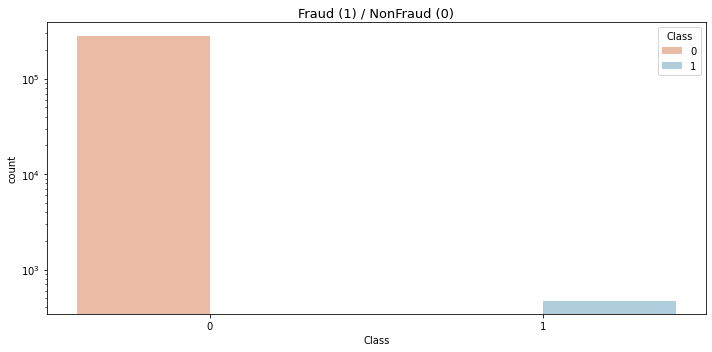

In [79]:
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ax.set_title('Fraud (1) / NonFraud (0)', color = 'black', size = 13)
sns.countplot(data=creditCards,x="Class", hue="Class", palette='RdBu', orient="h")
ax.set_yscale('log')
ax.plot()
plt.tight_layout()

We can see, that his dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. 

**Display fraud amounts according to their time**

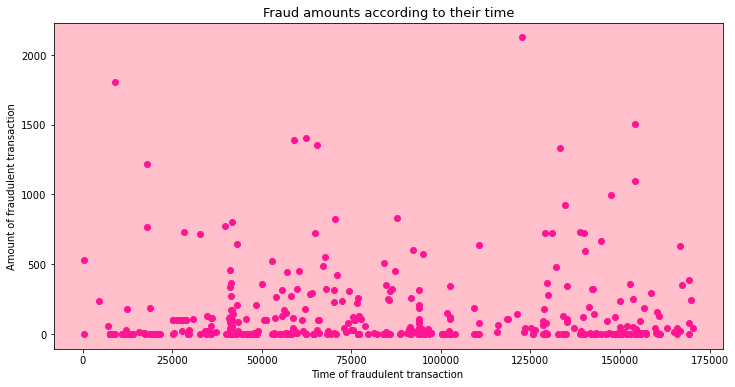

In [80]:
ax = plt.figure(figsize=(12,6)).add_subplot(111)
ax.set_title('Fraud amounts according to their time', color = 'black', size = 13)
ax.set_facecolor('pink')
ax.scatter(x=numberOfFraudulentCases['Time'], y=numberOfFraudulentCases['Amount'],c = 'deeppink' ) 
plt.xlabel('Time of fraudulent transaction ')
plt.ylabel('Amount of fraudulent transaction')
plt.show()

So, we can see, that the time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amounts.

In [81]:
bigAmounOfFraudulentCases = numberOfFraudulentCases[numberOfFraudulentCases['Amount'] > 1000].shape[0]
print('In this dataset we have only', str(bigAmounOfFraudulentCases), 'fraudulent transaction, where amount more than 1000')

In this dataset we have only 9 fraudulent transaction, where amount more than 1000


**Distribution of each variable**

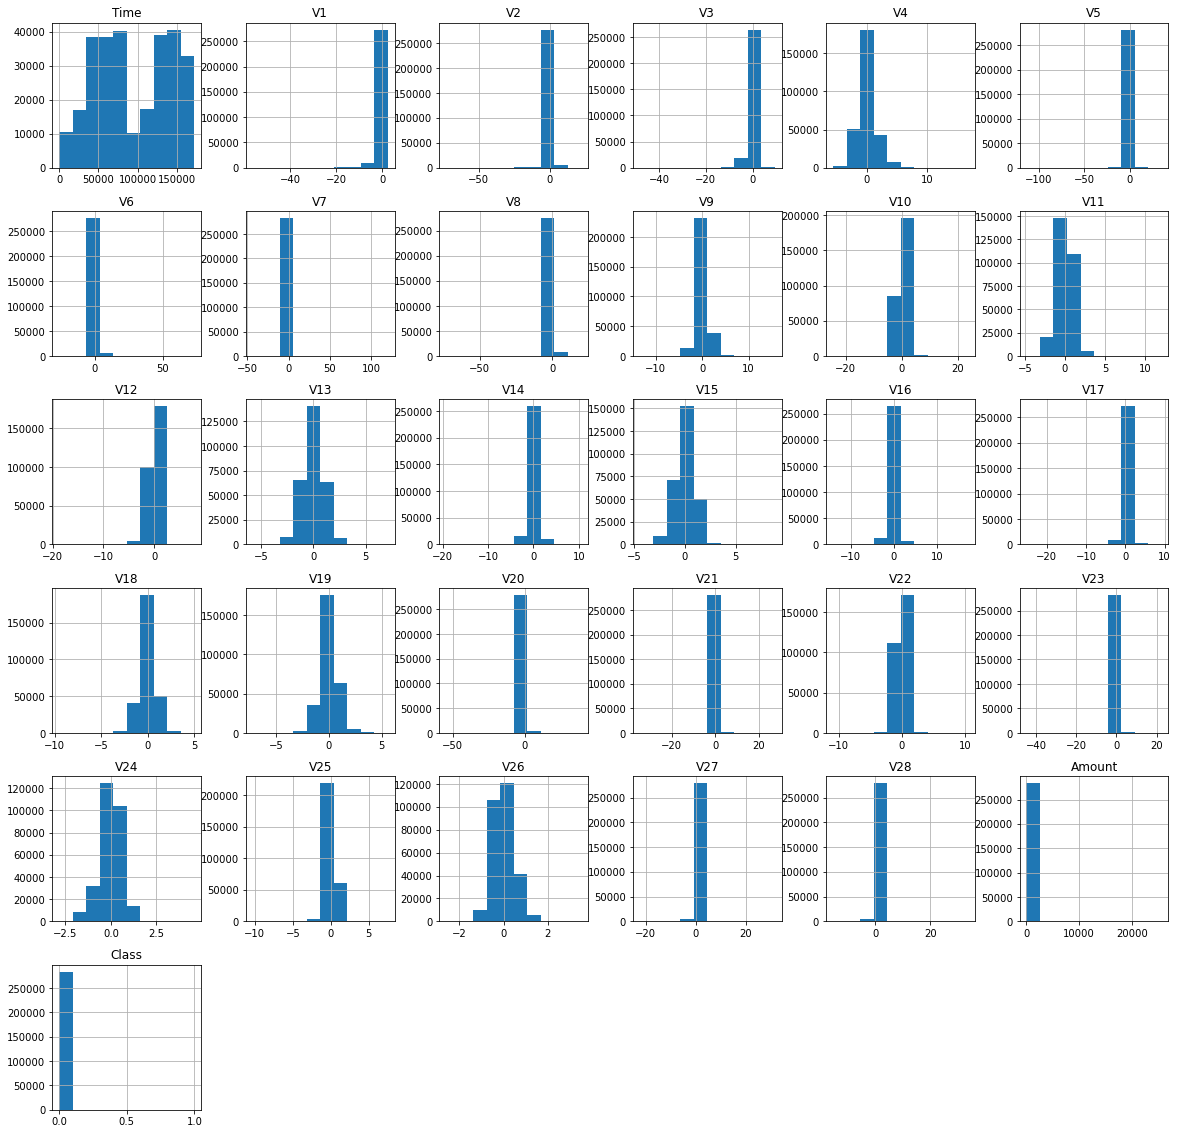

In [82]:
creditCards.hist(figsize = (20,20))
plt.show()

**Correlation matrix**
<br/>Correlation matrixessentially give us the information on how the variables are correlated. The closer the correlation value of two different variables to 1 or -1, the stronger the influence (positive or negative) of one another. Since we are interested in the variable 'Class', we will zoom into this variable and see the correlation of variable Class to other variables.

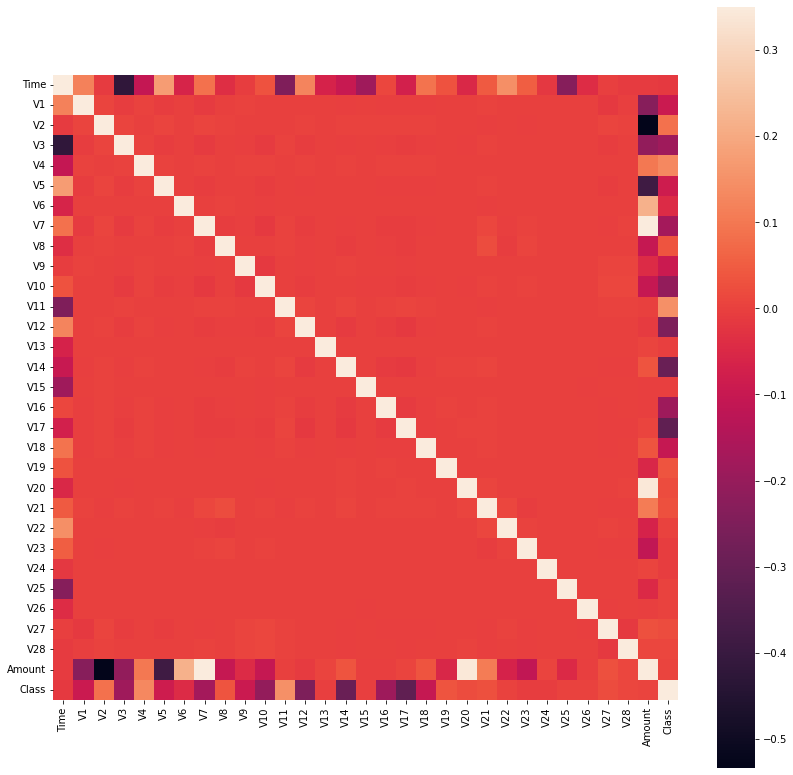

In [83]:
correlationMatrix = creditCards.corr()
fig = plt.figure(figsize = (14,14))
sns.heatmap(correlationMatrix, vmax=.35, square=True)
plt.show()

From this correlation matrix, we can see that there are no major correlations between the features in the dataset. Most of the relationships fall between -0.2 and 0.2. Though, there are some exceptions, particularly in analyzing the correlation between the amount feature, V7, and V20.
Another observation is the minimal relationship between the features and class. This can be attributed to the imbalanced nature of the data, which can downplay the importance of certain features.

# Data Preparation

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). While looking through the Statistical description of the features of the Credit Card sample dataset.It is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python. Now let’s drop the time feature. That does not have relevance in making classifications and just logs time… Then, we can split the data into training and testing values with a test size of 30%.We drop the features Time because of useless.

**Data Normalization**

In [84]:
sc = StandardScaler()
amount = creditCards['Amount'].values
creditCards['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
creditCards.drop('Time', axis = 1, inplace = True)
print(creditCards['Amount'].head(10))

0    0.244200
1   -0.342584
2    1.158900
3    0.139886
4   -0.073813
5   -0.338670
6   -0.333399
7   -0.190387
8    0.018879
9   -0.338630
Name: Amount, dtype: float64


**Independent Variable and Dependent Variable**

In [85]:
n=80000
X = creditCards.drop('Class', axis=1)
X = X.iloc[:n]
Y = creditCards['Class']
Y = Y.iloc[:n]

In [86]:
X.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.338670
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.333399
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,-0.190387
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.018879
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.338630


In [87]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int64

**Split the data**
<br/>Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating. We can split the data easily using the ‘train_test_split’ algorithm in python.

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(64000, 29) (64000,)
(16000, 29) (16000,)


So, we notice that the dataset is absolutely unbalanced. To solve this problem we use a method of under-sampling, which randomly extracts a sub class from the main class. 

In [89]:
balance = RandomUnderSampler()
X_balanced, Y_balanced = balance.fit_resample(X_train, Y_train)

So, now the dataset is balanced.

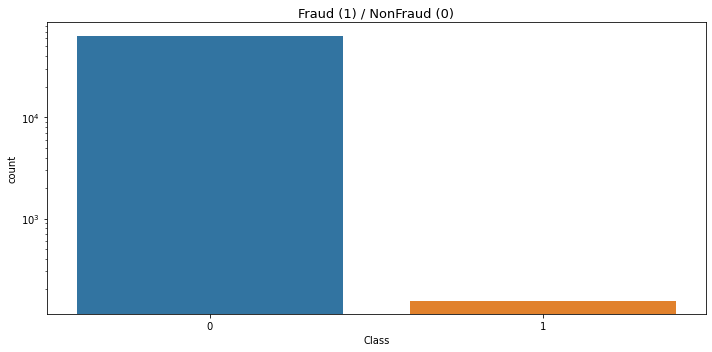

In [90]:
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ax.set_title('Fraud (1) / NonFraud (0)', color = 'black', size = 13)
sns.countplot(x=Y_train)
ax.set_yscale('log')
ax.plot()
plt.tight_layout()

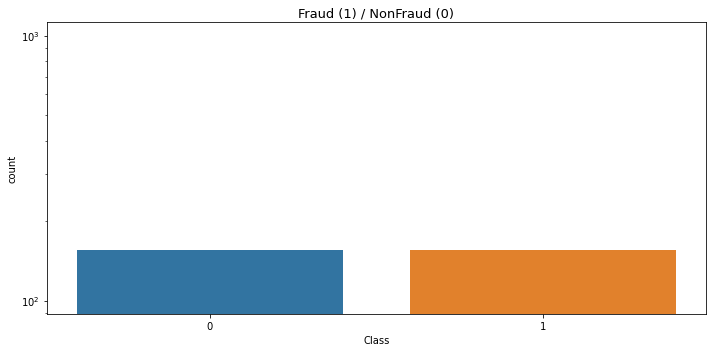

In [91]:
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ax.set_title('Fraud (1) / NonFraud (0)', color = 'black', size = 13)
sns.countplot(x=Y_balanced)
ax.set_yscale('log')
ax.plot()
plt.tight_layout()

# Modeling

Now the data is prepared to train a model. The objective of this project is to train a model to forecast credit card frauds. In this step, we will be building 4 different types of classification models: Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Bayesian network. Even though there are many more models which we can use, these are the most popular models used for solving classification problems. All these models can be built feasibly using the algorithms provided by the scikit-learn package. 

So, our goal is implementing these models in python.

We have some helper functions below:

In [137]:
def quality_metrics(pred_test,pred_train, Y_test, Y_train): 
    test_acc = accuracy_score(Y_test, pred_test)
    test_f1 = f1_score(Y_test, pred_test)
    test_prec = precision_score(Y_test, pred_test)
    test_rec = recall_score(Y_test, pred_test)
    test_falseNegRate = 1-test_rec
    
    train_acc = accuracy_score(Y_train, pred_train)
    train_f1 = f1_score(Y_train, pred_train)
    train_prec = precision_score(Y_train, pred_train)
    train_rec = recall_score(Y_train, pred_train)
    train_falseNegRate = 1-train_rec

    qua_metrics_df = pd.DataFrame({'y_train': [train_acc, train_f1,train_prec, train_rec, train_falseNegRate],'y_test':  [test_acc, test_f1,test_prec, test_rec, test_falseNegRate]}, index =["Accurancy", "F1 Score","Presicion","Recall", "FalseNegRate"])
    return qua_metrics_df

In [138]:
def confusion_matrix_plot(cnf_matrix, title):
    cnf_matrix_pd=pd.DataFrame(data=cnf_matrix,columns=['Predicted fraud','Predicted non-fraud'],index=['Fraud','Non-fraud'])
    plt.figure(figsize = (8,5))
    plt.title(title)
    sns.heatmap(cnf_matrix_pd, annot=True,fmt='d',cmap="YlGnBu");

In [139]:
def table(x, y):
    cm_11 = pd.DataFrame(pred_prob_y_lgp, columns = ['probability'])
    cm_12 = pd.DataFrame(pred_y_class_lgp, columns = ['result'])
    pd.concat([cm_11, cm_12], axis = 1)
    return pd.concat([cm_11, cm_12], axis = 1)

In [140]:
def Gini(x):
    v = 0
    for k, x_k in enumerate(x[:-1], 1):
        v += np.sum(np.abs(x_k - x[k:]))
    return v / (len(x)**2 * np.mean(x))

Type-I Error or False Positives: False Positives are the ones which are actually not fraud but the prediction said that they are fraud.
Type-II Error or False Negatives: False Negatives are the ones which are actually fraud but the system said that they aren't.

So, we can say that Type-II Error is more significant because we don't want system to have a fraudulent credit card because that can be more dangerous.

In [141]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

# Logistic Regression

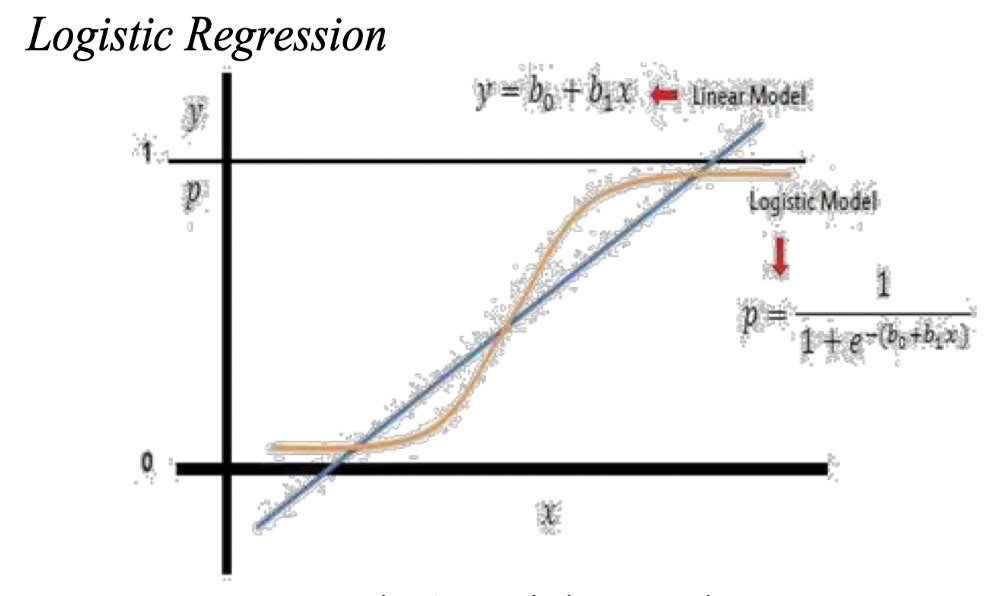
This algorithm similar to linear regression algorithm. But linear regression is used for predict / forecast values and Logistic regression is used for classification task. So, Logistic regression is applied to predict categorical variables (yes or no, true or false, malign or benign, cat or dog, etc). This model uses the the Sigmoid Function to predict the classes:

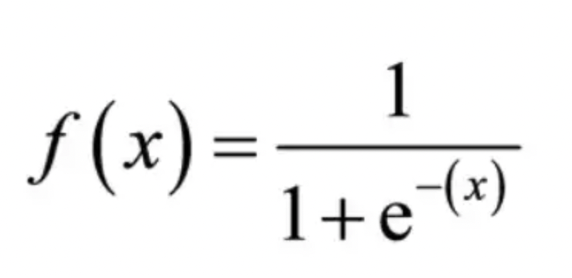

It is a popular supervised Machine Learning algorithm. It often result the probability of occurring of an event. That’s why this model will be great for this project because we are finding the possibility whether a transaction is fraud or legit. Since the outcome is a probability, it often results the answer between 0 and 1. This is the formula for logistic regression.

Logit(pi) = 1/(1+ exp(-pi))

ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k

Here the logit(pi) is a dependent variable whereas x is independent. MLE is commonly used in order to estimate the beta parameter, or coefficient, in this model. Multiplication of beta values is performed through multiple iterations to find the most appropriate log-odds fit.

The log-likelihood function is calculated from all of these iterations, and logistic regres-sion attempts to maximize it to determine the best parameter estimate. It is then possible to calculate the conditional probabilities for each observation, log them, and sum them up to calculate the predicted probabilities once the optimal coefficient (or coefficients) have been determined. Probabilities less than or equal to 0.5 accurately predict 0 for binary classification, while probabilities greater than 0.5 accurately predict 1.

The steps for training a model and predict, after choosing it, are:
1. Instantiating the model
2. Train the model
3. Predict using the model
4. Analize quality metrics

**LogisticRegression Model_1**

In [142]:
model_log_1_imb = LogisticRegression(max_iter=3000)
model_log_1_imb.fit(X_train, Y_train)
pred_test_1_imb = model_log_1_imb.predict(X_test)
pred_train_1_imb = model_log_1_imb.predict(X_train)
# Getting the probabilities
prob_train_1_imb= model_log_1_imb.predict_proba(X_train)[:, 1]
prob_test_1_imb = model_log_1_imb.predict_proba(X_test)[:, 1]

In [143]:
print('Quality_metrics for Model : ')
quality_metrics(pred_test_1_imb, pred_train_1_imb, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.998516,0.998875
F1 Score,0.649446,0.763158
Presicion,0.758621,0.828571
Recall,0.567742,0.707317
FalseNegRate,0.432258,0.292683


In [144]:
print(classification_report(Y_test, pred_test_1_imb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15959
           1       0.83      0.71      0.76        41

    accuracy                           1.00     16000
   macro avg       0.91      0.85      0.88     16000
weighted avg       1.00      1.00      1.00     16000



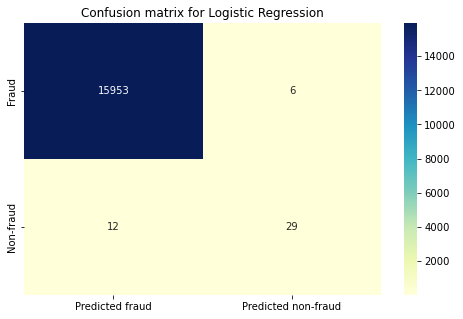

In [145]:
matrixLogRegression = confusion_matrix(Y_test, pred_test_1_imb) 
confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")

In [146]:
fpr, tpr, threshold = roc_curve(Y_test, prob_test_1_imb)

In [147]:
auc = roc_auc_score(Y_test, prob_test_1_imb)
auc

0.9931852811854769

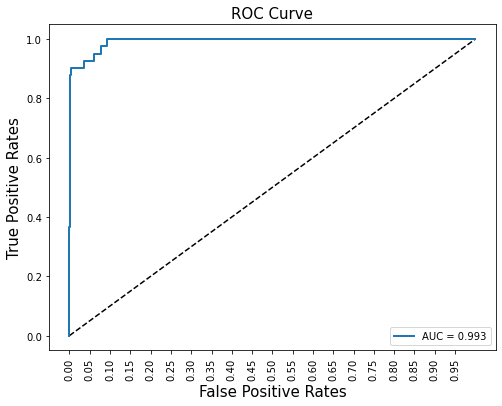

In [148]:

plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % auc)

 We can try to train the Logistic Regression models on the 2nd degree of polynomials.

**LogisticRegression Model_2**

In [149]:
# Getting the polynomial features
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)
X_test_poly = p.fit_transform(X_test)

# Training the model
model_log_1_poly = LogisticRegression(max_iter=3000)
model_log_1_poly.fit(X_train_poly, Y_train)

pred_test_1_poly  = model_log_1_poly.predict(X_test_poly)
pred_train_1_poly = model_log_1_poly.predict(X_train_poly)

# Getting the probabilities
prob_train_1_poly = model_log_1_poly.predict_proba(X_train_poly)[:, 1]
prob_test_1_poly = model_log_1_poly.predict_proba(X_test_poly)[:, 1]

In [150]:
print('Quality_metrics for Model : ')
quality_metrics(pred_test_1_poly, pred_train_1_poly, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.999891,0.999500
F1 Score,0.976898,0.897436
Presicion,1.000000,0.945946
Recall,0.954839,0.853659
FalseNegRate,0.045161,0.146341


In [151]:
print(classification_report(Y_test, pred_test_1_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15959
           1       0.95      0.85      0.90        41

    accuracy                           1.00     16000
   macro avg       0.97      0.93      0.95     16000
weighted avg       1.00      1.00      1.00     16000



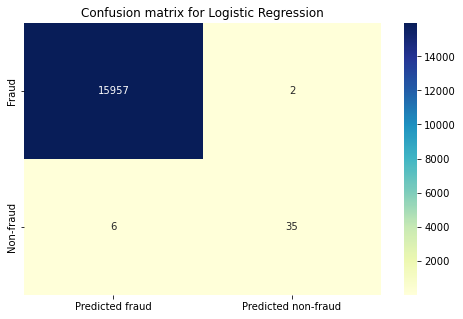

In [152]:
matrixLogRegression = confusion_matrix(Y_test, pred_test_1_poly) 
confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")

In [153]:
fpr, tpr, threshold = roc_curve(Y_test, prob_test_1_poly)

In [154]:
auc = roc_auc_score(Y_test, prob_test_1_poly)
auc

0.9369069215474409

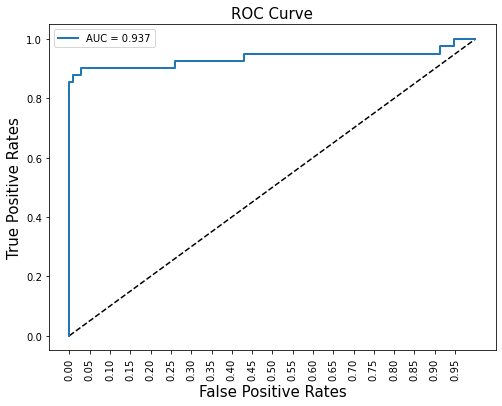

In [155]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % auc)

Recall has increased when the model is made complex.

Data is highly imbalanced, so in the next model we will use our balanced data

**LogisticRegression Model_3**

In [156]:
model_log_1 = LogisticRegression()
model_log_1.fit(X_balanced, Y_balanced)
pred_test_1 = model_log_1.predict(X_test)
pred_train_1 = model_log_1.predict(X_train)
# Getting the probabilities
prob_train_1 = model_log_1.predict_proba(X_train)[:, 1]
prob_test_1 = model_log_1.predict_proba(X_test)[:, 1]

In [157]:
print('Quality_metrics for Model : ')
quality_metrics(pred_test_1, pred_train_1, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.963344,0.963625
F1 Score,0.114048,0.120846
Presicion,0.060570,0.064412
Recall,0.974194,0.975610
FalseNegRate,0.025806,0.024390


In [158]:
print(classification_report(Y_test, pred_test_1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15959
           1       0.06      0.98      0.12        41

    accuracy                           0.96     16000
   macro avg       0.53      0.97      0.55     16000
weighted avg       1.00      0.96      0.98     16000



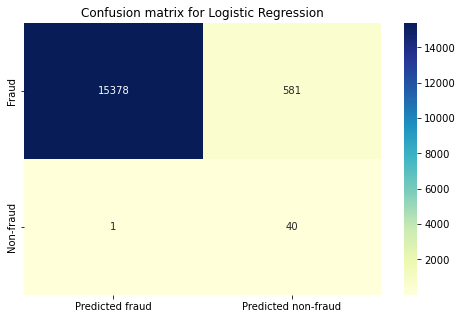

In [159]:
matrixLogRegression = confusion_matrix(Y_test, pred_test_1) 
confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")

In [160]:
fpr, tpr, threshold = roc_curve(Y_test, prob_test_1)

In [161]:
auc = roc_auc_score(Y_test, prob_test_1)
auc

0.9970411985591126

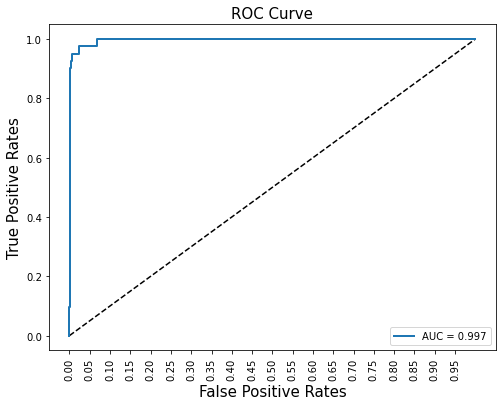

In [162]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % auc)

Results show that trained models perform well. The models presented high accuracy and area-under-curve numbers.
To improve our accuracy further, we can try tune the hyper parameter.

**LogisticRegression Model_4**

In [163]:
model_log_2 = LogisticRegression(class_weight={0:0.6,1:0.4})
model_log_2.fit(X_balanced, Y_balanced)
pred_test_2 = model_log_2.predict(X_test)
pred_train_2 = model_log_2.predict(X_train)

In [164]:
print('Quality_metrics for Model : ')
quality_metrics(pred_test_2, pred_train_2, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.971969,0.971437
F1 Score,0.140805,0.148976
Presicion,0.076048,0.080645
Recall,0.948387,0.975610
FalseNegRate,0.051613,0.024390


In [165]:
print(classification_report(Y_test, pred_test_2))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15959
           1       0.08      0.98      0.15        41

    accuracy                           0.97     16000
   macro avg       0.54      0.97      0.57     16000
weighted avg       1.00      0.97      0.98     16000



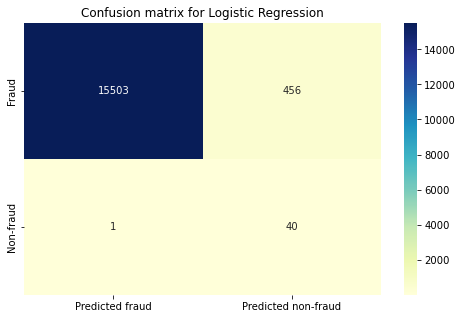

In [166]:
matrixLogRegression = confusion_matrix(Y_test, pred_test_2) 
confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")

Try cross Validation Like KFOLD and Hyperpaqrameter Tuning 

**LogisticRegression Model_5**

In [167]:
model_log_3 = LogisticRegression(max_iter=100, solver='liblinear')
# Hyperparameters
grid = {'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

cv = KFold(n_splits=5,random_state=None,shuffle=False)
model_log_3_=GridSearchCV(model_log_3, grid, cv=cv, n_jobs=-1, scoring='f1_macro', error_score='raise')
model_log_3_.fit(X_balanced, Y_balanced)

pred_test_3 = model_log_3_.predict(X_test)
pred_train_3 = model_log_3_.predict(X_train)



In [168]:
print('Quality_metrics for Model : ')
quality_metrics(pred_test_3, pred_train_3, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.956844,0.957187
F1 Score,0.097386,0.104575
Presicion,0.051291,0.055249
Recall,0.961290,0.975610
FalseNegRate,0.038710,0.024390


In [169]:
print(classification_report(Y_test, pred_test_3))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15959
           1       0.06      0.98      0.10        41

    accuracy                           0.96     16000
   macro avg       0.53      0.97      0.54     16000
weighted avg       1.00      0.96      0.98     16000



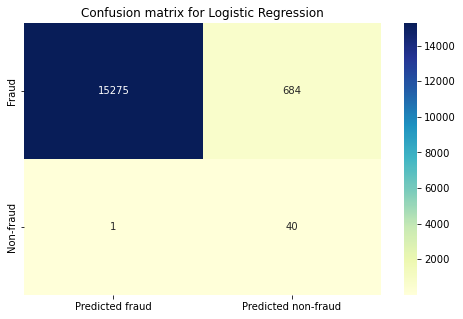

In [170]:
matrixLogRegression = confusion_matrix(Y_test, pred_test_3) 
confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")


Results for threshold = 
 0.5

     probability  result
0  1.277618e-04       0
1  4.050858e-05       0
2  3.245493e-05       0
3  1.343867e-06       0
4  5.454896e-06       0
5  5.003049e-08       0
6  1.558028e-04       0
7  2.985910e-05       0
8  1.312902e-04       0
9  2.825216e-05       0

Quality_metrics for Model : 
                    Res
Accurancy      0.998500
F1 Score       0.657143
Presicion      0.793103
Recall         0.560976
FalseNegRate   0.439024
Gini           0.960040
Roc Auc score  0.971337

Results for threshold = 
 0.55

     probability  result
0  1.277618e-04       0
1  4.050858e-05       0
2  3.245493e-05       0
3  1.343867e-06       0
4  5.454896e-06       0
5  5.003049e-08       0
6  1.558028e-04       0
7  2.985910e-05       0
8  1.312902e-04       0
9  2.825216e-05       0

Quality_metrics for Model : 
                    Res
Accurancy      0.998500
F1 Score       0.657143
Presicion      0.793103
Recall         0.560976
FalseNegRate   0.439024
Gini     

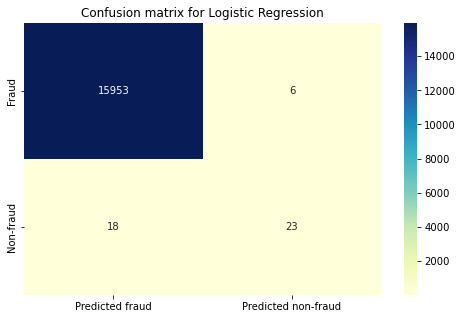

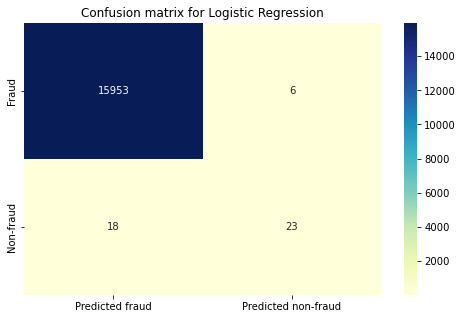

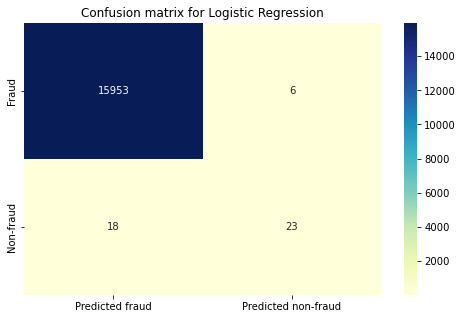

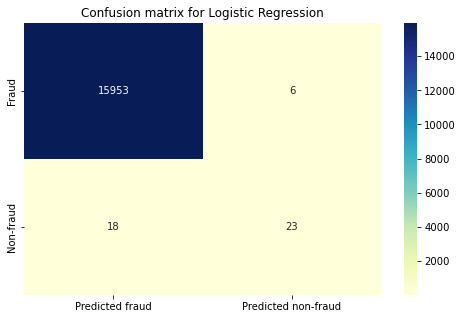

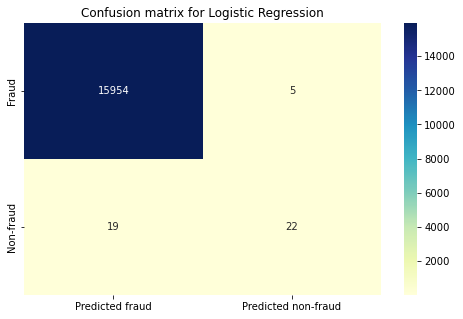

In [171]:
thresholds = [0.5, 0.55, 0.6, 0.75, 0.85]
for i in thresholds:
    print('\nResults for threshold = \n', i)
    matrixLogRegression = 0 
    pred_prob_y_lgp = cross_val_predict(model_log_1_poly, X_test, Y_test, cv = 4, method = 'predict_proba')[:,1] 
    pred_prob_y_lgp = pred_prob_y_lgp.reshape(-1,1)
    pred_y_class_lgp = binarize(pred_prob_y_lgp, threshold = i)
    pred_y_class_lgp = np.where(pred_y_class_lgp == 1, 1, 0)
    matrixLogRegression = confusion_matrix(Y_test, pred_y_class_lgp) 
    confusion_matrix_plot(matrixLogRegression, "Confusion matrix for Logistic Regression")
    t = table(pred_prob_y_lgp, pred_y_class_lgp)
    print('\n', t[:10])     
    print('\nQuality_metrics for Model : ')
    test_acc = accuracy_score(Y_test, pred_y_class_lgp)
    test_f1 = f1_score(Y_test, pred_y_class_lgp)
    test_prec = precision_score(Y_test, pred_y_class_lgp)
    test_rec = recall_score(Y_test, pred_y_class_lgp)
    test_falseNegRate = 1-test_rec
    test_gini = Gini(pred_prob_y_lgp)
    test_roc_auc_score = roc_auc_score(Y_test, pred_prob_y_lgp)
    qua_metrics_df = pd.DataFrame({'Res': [test_acc, test_f1, test_prec, test_rec, test_falseNegRate, test_gini, test_roc_auc_score]}, index =["Accurancy", "F1 Score","Presicion","Recall", "FalseNegRate", "Gini", "Roc Auc score"])
    print(qua_metrics_df)


So, Logistic Regression shows quite a good results, lets check other models and choose the most appropriate model which can be used for our case.

# Support Vector Machine

Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. 
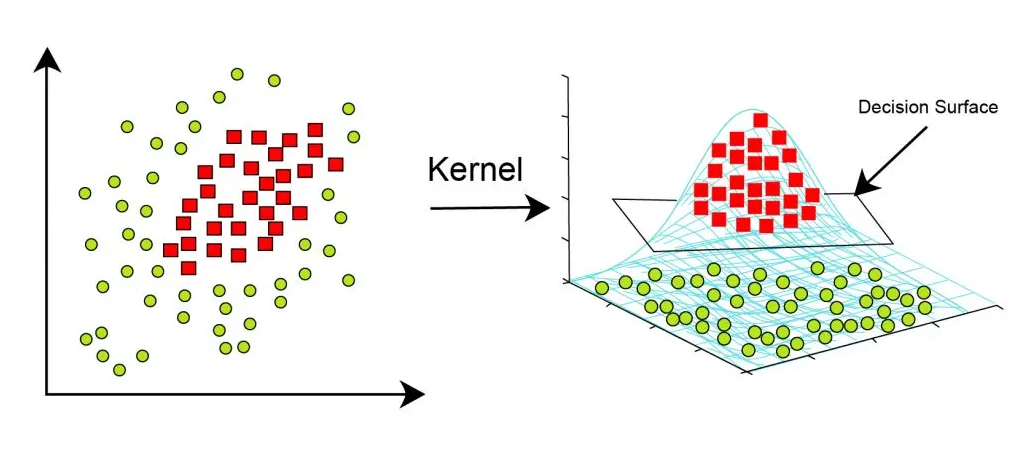

The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three.


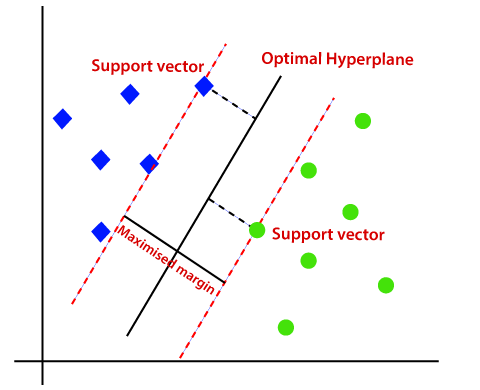
The steps for training a model and predict, after choosing it, are:
1. Instantiating the model
2. Model training
3. Predicting
4. Analizing Connfusion Matrix results

In [122]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, Y_train)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [123]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.998828,0.998938
F1 Score,0.742268,0.779221
Presicion,0.794118,0.833333
Recall,0.696774,0.731707
FalseNegRate,0.303226,0.268293


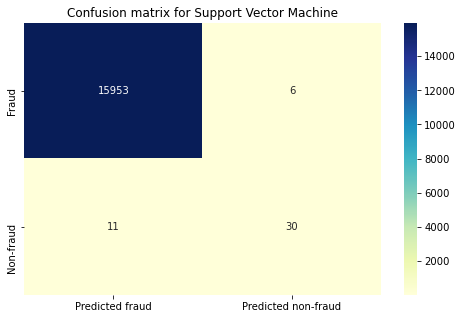

In [124]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

Got pretty good results, hovewer will try do decrease false negative cases using "poly" kernel and balance data

In [36]:
model_svm = SVC(kernel='poly')
model_svm.fit(X_balanced, Y_balanced)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [37]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.998531,0.998875
F1 Score,0.688742,0.769231
Presicion,0.707483,0.810811
Recall,0.670968,0.731707
FalseNegRate,0.329032,0.268293


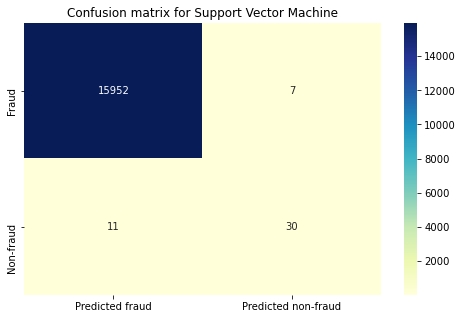

In [38]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

Received worse results, consequently proceed with normal data and other kernel - "sigmoid"

In [39]:
model_svm = SVC(kernel='sigmoid')
model_svm.fit(X_train, Y_train)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [40]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.997344,0.997188
F1 Score,0.392857,0.366197
Presicion,0.440000,0.433333
Recall,0.354839,0.317073
FalseNegRate,0.645161,0.682927


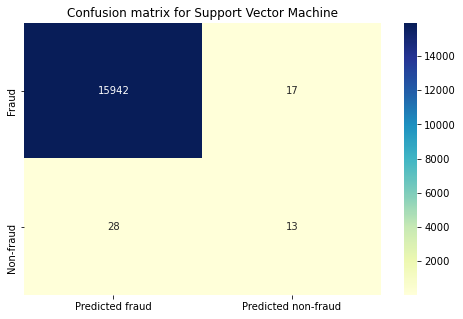

In [41]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

Try the same but balanced data

In [47]:
model_svm = SVC(kernel='sigmoid')
model_svm.fit(X_balanced, Y_balanced)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [48]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.998875,0.999313
F1 Score,0.788235,0.873563
Presicion,0.724324,0.826087
Recall,0.864516,0.926829
FalseNegRate,0.135484,0.073171


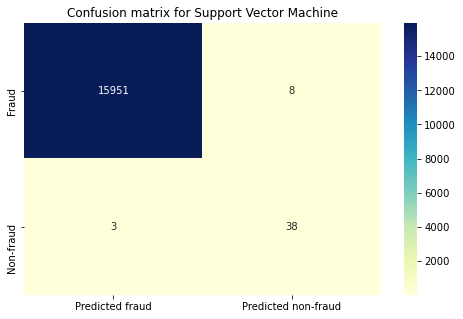

In [49]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

Got better results comparing with unbalanced, but try to choose other kernel

In [44]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train, Y_train)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [45]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.999578,0.999437
F1 Score,0.907850,0.876712
Presicion,0.963768,1.000000
Recall,0.858065,0.780488
FalseNegRate,0.141935,0.219512


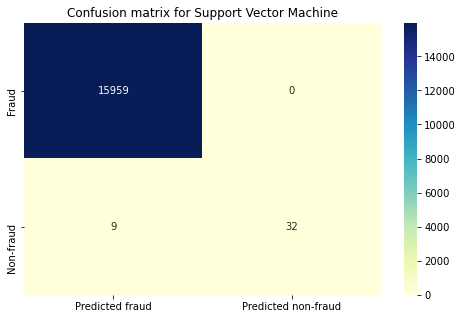

In [46]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

## Currently best result

In [50]:
model_svm = SVC(kernel='rbf')
model_svm.fit(X_balanced, Y_balanced)
model_svm_pred_test = model_svm.predict(X_test)
model_svm_pred_train = model_svm.predict(X_train)

In [51]:
print('Quality_metrics for Model : ')
quality_metrics(model_svm_pred_test, model_svm_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.996891,0.996563
F1 Score,0.573876,0.580153
Presicion,0.429487,0.422222
Recall,0.864516,0.926829
FalseNegRate,0.135484,0.073171


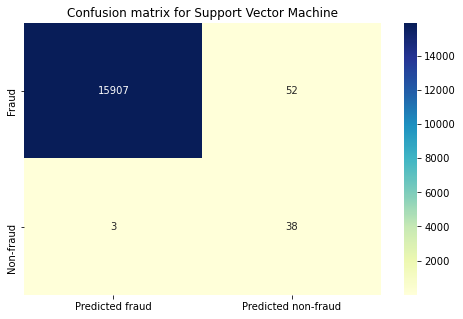

In [52]:
matrixSVM = confusion_matrix(Y_test, model_svm_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Support Vector Machine")

Previously best "rbf" kernel reveals the worst results with balanced data

## Best results - common data and "rbf" kernel

# Random Forest

In [125]:
model_rf = RandomForestClassifier(max_depth = 4)
model_rf.fit(X_train, Y_train)
model_rf_pred_test = model_rf.predict(X_test)
model_rf_pred_train = model_rf.predict(X_train)

In [126]:
print('Quality_metrics for Model : ')
quality_metrics(model_rf_pred_test, model_rf_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.999469,0.999437
F1 Score,0.879433,0.876712
Presicion,0.976378,1.000000
Recall,0.800000,0.780488
FalseNegRate,0.200000,0.219512


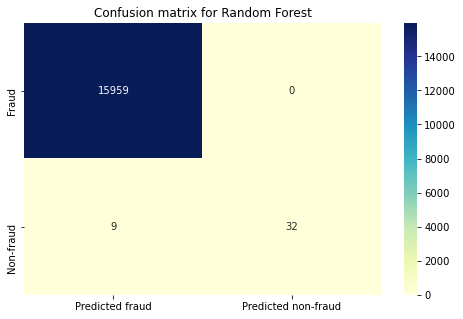

In [127]:
matrixSVM = confusion_matrix(Y_test, model_rf_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Random Forest")

In [53]:
model_rf = RandomForestClassifier(max_depth = 4)
model_rf.fit(X_balanced, Y_balanced)
model_rf_pred_test = model_rf.predict(X_test)
model_rf_pred_train = model_rf.predict(X_train)

In [54]:
print('Quality_metrics for Model : ')
quality_metrics(model_rf_pred_test, model_rf_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.996281,0.996062
F1 Score,0.549242,0.553191
Presicion,0.388740,0.390000
Recall,0.935484,0.951220
FalseNegRate,0.064516,0.048780


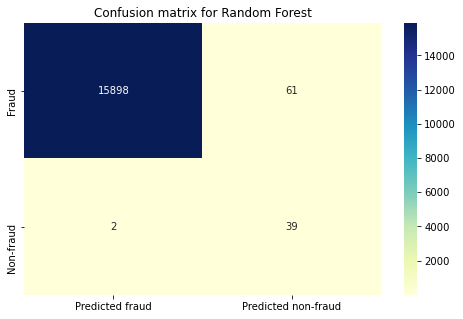

In [55]:
matrixSVM = confusion_matrix(Y_test, model_rf_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Random Forest")

In [56]:
model_rf = RandomForestClassifier(max_depth = 2)
model_rf.fit(X_train, Y_train)
model_rf_pred_test = model_rf.predict(X_test)
model_rf_pred_train = model_rf.predict(X_train)

In [57]:
print('Quality_metrics for Model : ')
quality_metrics(model_rf_pred_test, model_rf_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.998703,0.998938
F1 Score,0.706714,0.779221
Presicion,0.781250,0.833333
Recall,0.645161,0.731707
FalseNegRate,0.354839,0.268293


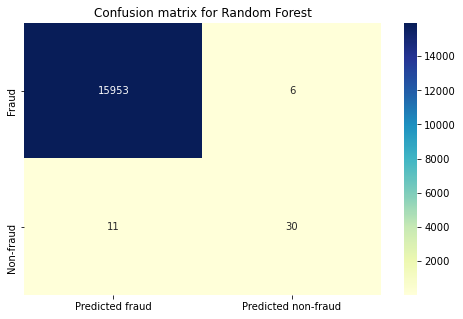

In [58]:
matrixSVM = confusion_matrix(Y_test, model_rf_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Random Forest")

In [60]:
model_rf = RandomForestClassifier(max_depth = 5)
model_rf.fit(X_train, Y_train)
model_rf_pred_test = model_rf.predict(X_test)
model_rf_pred_train = model_rf.predict(X_train)

In [61]:
print('Quality_metrics for Model : ')
quality_metrics(model_rf_pred_test, model_rf_pred_train, Y_test, Y_train ) 

Quality_metrics for Model : 


,y_train,y_test
Accurancy,0.999609,0.999563
F1 Score,0.912892,0.906667
Presicion,0.992424,1.000000
Recall,0.845161,0.829268
FalseNegRate,0.154839,0.170732


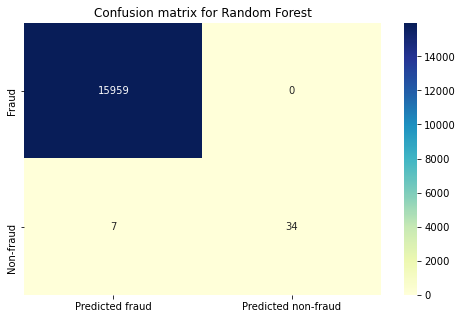

In [62]:
matrixSVM = confusion_matrix(Y_test, model_rf_pred_test) 
confusion_matrix_plot(matrixSVM, "Confusion matrix for Random Forest")